# 머신러닝 정리

## 머신러닝 처리방식

- 원리
  - x : 데이터
  - y : 정답
  - train : 훈련/학습, 주어진 입력 x로 부터 출력 y로 가는 **규칙성을 찾는 과정**
- 예측
  - 규칙성을 발견한 후(학습 종료후), 새로운 데이터가 들어오면 발견한 규칙성을 기준으로 정답을 찾음

## 머신러닝을 위한 데이터

- 훈련 데이터 : 모델 학습 용도
- 테스트 데이터 : 모델 성능 **평가** 용도
- 검증용 데이터 : 모델 성능 **조정** 용도
  - 과(대/소)적합(overfitting) 판단 용도
  - 하이퍼파라미터(모델 성능에 영향을 주는, 사람이 지정하는 변수) 조정 용도
    - <-> 매개변수(가중치, 편향등 학습 하는 동안 계속 변하는 수)
    - 튜닝 : 검증용 데이터를 이용하여 높은 정확도를 얻고록 하이퍼파라미터 값을 바꿔보는것

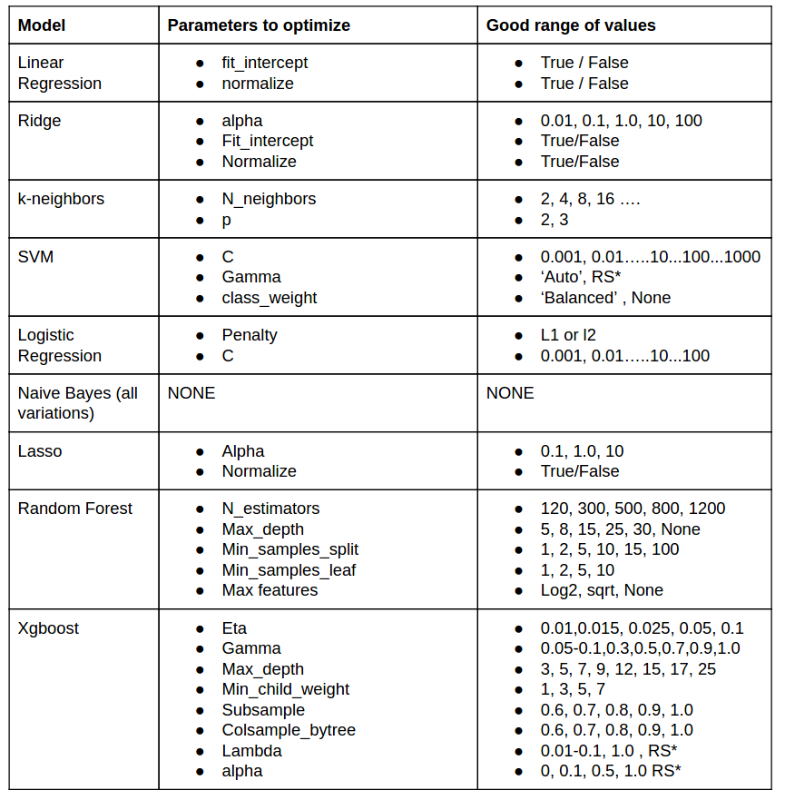

In [5]:
from IPython.display import Image
Image('/content/drive/MyDrive/빅데이터_딥러닝/Day01/add/추가자료_하이퍼파라미터.png')
# 하이퍼 파라미터표

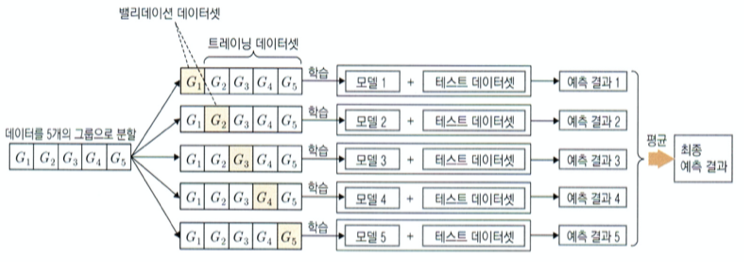

In [6]:
Image('/content/drive/MyDrive/빅데이터_딥러닝/Day01/add/추가자료_머신러닝_학습시_검증폴드지정.png')

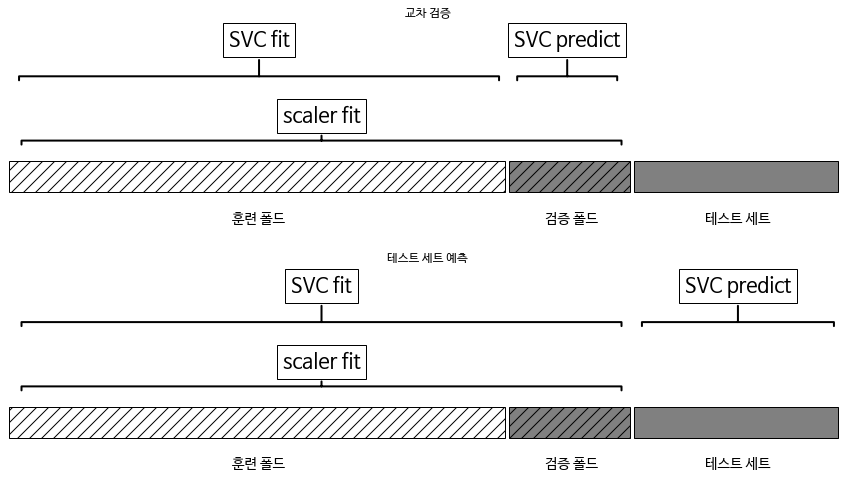

In [7]:
Image('/content/drive/MyDrive/빅데이터_딥러닝/Day01/add/추가자료_머신러닝_파이프라인사용의미1.png')

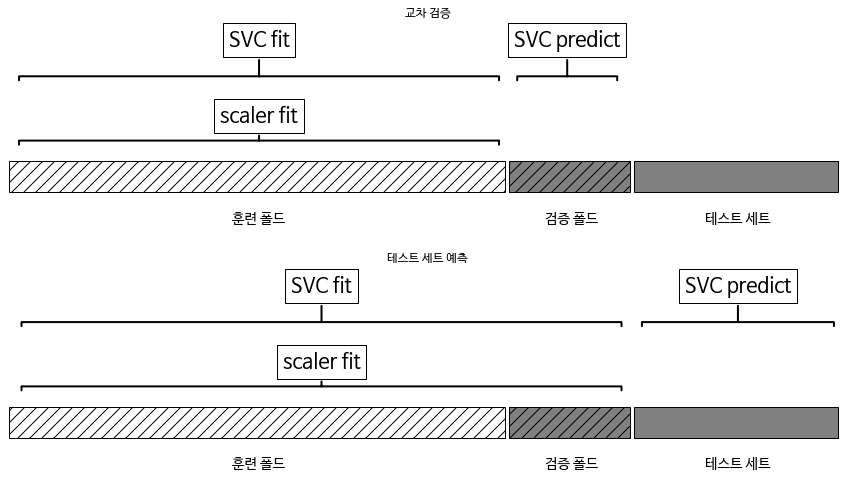

In [8]:
Image('/content/drive/MyDrive/빅데이터_딥러닝/Day01/add/추가자료_머신러닝_파이프라인사용의미2.png')

# 파이프라인을 사용하면, 전처리기가 정확하게 데이터에 맞게 작동한다
# 사용하지 않으면 검증용 데이터가 훈련용 데이터에 영향을미친다 => 정확도가 부정확해진다

## 지도 학습(Supervised Learning)

- 분류
  - 이진 분류 문제 (Binary Classification)
  - 다중 클레스 분류 (Multi-class Classification)
  - y 값은 분리된
    - 비연속적인 답
    - category, 이산형 데이터
- 회귀
  - 어떤 **연속적인 값**의 범위 내에서, 예측값이 나오는 경우
  - 예)
    - x : 전철역과 거리, 인구 분포, 집의 유형, ...
    - y : 부동산 가격 ( 5억 1200만, 6억 5200만, ..)
      - 연속된 값을 결과로 가짐
      - 주가 / 생산량 / 지수 예측 등등 연속적 숫자

## 샘플, 특성

- x : 독립변수
- y : 종속변수
- sample : 하나의 행, 하나의 데이터
- feature :  y를 예측하기 위한 각각의 x

## 혼동행렬(Confusion Matrix)

- **성능 예측은 상황마다, 비즈니스의 특성에 따라 기준이 달라짐**
- 예시 1) 비가 오는 날을 예측하는 모델, 
  - 실제 100일 동안 총 3일만 비가 왔다. 
  - 모델은 100일 내내 날씨가 맑았다고 예측함. 
    - 이 모델은 100번 중 총 3회 틀렸다. 97/100=0.97이므로 정확도는 97%. 
    - **하지만 정작 비가 온 날은 하나도 못 맞췄다**.

- 스팸 메일을 분류하는 스팸 메일 분류기
  - 메일 100개 중 스팸 메일은 5개. 
  - 스팸 메일 분류기는 모두 정상 메일이라고 탐지
    - 정확도는 95%. 
    - **그러나 정작 스팸 메일은 하나도 못 찾아냈다**.

- 더 중요한 데이터가 전체 데이터에서 너무 적은 비율을 차지한다면 정확도는 좋은 측정 지표가 될 수 없다. 
  - **F1-Score를 사용**
- 암환자 예측이나 보험사기와 같은 금융 사기 적발 모델
  - **재현율이 정밀도보다 중요**
- 스팸메일 여부 적발 모델
  - **정밀도가 더 중요**
- 가장 좋은 것은 정밀도와 재현율 모두 높은 수치를 얻는 것


## 손실값

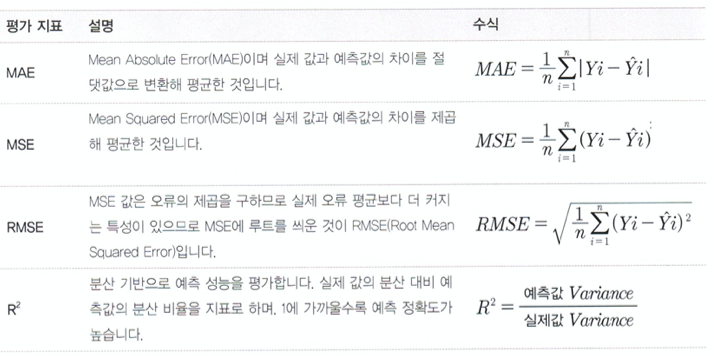

In [ ]:
from IPython.display import Image

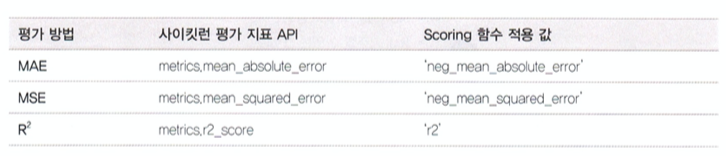

In [ ]:
# 사이킷런은 RMSE를 제공하지 않음
# MSE에 직접 제곱근을 씨워서 계산해야 한다

## 과적합(Overfitting)과 과소 적합(Underfitting)



- 원리
  - 기출문제만 엄청 풀어서, 문제 번호만 봐도 정답을 맞출 수 있다
  - 전혀 다른 패턴의 문제가 나왔을때, 점수가 않좋다면?
- 과적합
  - 훈련 데이터를 과하게 학습한 경우
  - 학습에 사용하는 훈련 데이터는 실제에 비하면 일부에 불과한 데이터
  - 기계가 훈련 데이터에 대해서만 과하게 학습하면 성능 측정을 위한 데이터인 테스트 데이터나 실제 서비스에서는 정확도가 좋지 않은 현상이 발생
    - 진단
      - **훈련 데이터 정확도 높다, 테스트 데이터 정확도 낮다**
  - 테스트 데이터로 예측하는 오차가 더 커기지 전에 멈추는것이 적합
    - 딥러닝: 조기학습종료, 드롭아웃으로 해결    
  
- 과소적합
  - 테스트 데이터의 예측성능이 올라가 여지가 있는데 훈련을 덜 한 상태
  - 훈련 자체가 부족한 상태
    - **훈련데이터 정확도 낮다, 테스트 데이터 정확도 낮다**
    - 학습을 더 진행


- 절차
  - Step 1. 주어진 데이터를 훈련 데이터, 검증 데이터, 테스트 데이터로 나눈다. 
  - Step 2. 훈련 데이터로 모델을 학습한다. (에포크 +1)
  - Step 3. 검증 데이터로 모델을 평가하여 검증 데이터에 대한 정확도와 오차(loss)를 계산한다.
  - Step 4. 검증 데이터의 오차가 증가하였다면 과적합 징후이므로 학습 종료 후 Step 5로 이동, 아니라면 Step 2.로 재이동한다.
  - Step 5. 모델의 학습이 종료되었으니 테스트 데이터로 모델을 평가한다.
